# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 3-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

### Loading and cleaning energy data

In [2]:
# read sheet names of excel file
xls_file = pd.ExcelFile('assets/Energy Indicators.xls')
xls_file.sheet_names

['Energy']

In [3]:
# read data from excel file to 'Energy' DataFrame
Energy = pd.read_excel(xls_file,
                       sheet_name='Energy',
                       usecols=[2,3,4,5],
                       #columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable],
                       na_values=np.nan).drop(index=range(0,17),
                                              axis=0).drop(range(244,282),
                                                           axis=0)

# set columns` names
Energy.rename(columns={'Unnamed: 2':'Country',
               'Unnamed: 3':'Energy Supply',
               'Unnamed: 4':'Energy Supply per Capita',
               'Unnamed: 5':'% Renewable'},
             inplace=True)
Energy.head(10)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321,10,78.66928
18,Albania,102,35,100
19,Algeria,1959,51,0.55101
20,American Samoa,...,...,0.641026
21,Andorra,9,121,88.69565
22,Angola,642,27,70.90909
23,Anguilla,2,136,0
24,Antigua and Barbuda,8,84,0
25,Argentina,3378,79,24.06452
26,Armenia,143,48,28.23606


In [4]:
# set 'NaN' values in the place of missing data
Energy.loc[:,['Energy Supply','Energy Supply per Capita','% Renewable']] = Energy.loc[:,['Energy Supply','Energy Supply per Capita','% Renewable']].replace('[. ]+',np.nan,regex=True)
Energy.head(10)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321.0,10.0,78.66928
18,Albania,102.0,35.0,100.0
19,Algeria,1959.0,51.0,0.55101
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9.0,121.0,88.69565
22,Angola,642.0,27.0,70.90909
23,Anguilla,2.0,136.0,0.0
24,Antigua and Barbuda,8.0,84.0,0.0
25,Argentina,3378.0,79.0,24.06452
26,Armenia,143.0,48.0,28.23606


In [5]:
# convert petajoules to gigajoules
Energy['Energy Supply'] = Energy['Energy Supply'] * 10**6
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321000000.0,10.0,78.66928
18,Albania,102000000.0,35.0,100.0
19,Algeria,1959000000.0,51.0,0.55101
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9000000.0,121.0,88.69565


In [6]:
# set 'Country' column as an index
Energy = Energy.set_index('Country')
Energy.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,321000000.0,10.0,78.66928
Albania,102000000.0,35.0,100.0
Algeria,1959000000.0,51.0,0.55101
American Samoa,NaN,NaN,0.641026
Andorra,9000000.0,121.0,88.69565


In [7]:
# transpose DataFrame
Energy = Energy.T
Energy.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe
Energy Supply,321000000.0,102000000.0,1959000000.0,NaN,9000000.0,642000000.0,2000000.0,8000000.0,3378000000.0,143000000.0,...,NaN,196000000.0,1798000000.0,3000000.0,2871000000.0,2554000000.0,0.0,344000000.0,400000000.0,480000000.0
Energy Supply per Capita,10.0,35.0,51.0,NaN,121.0,27.0,136.0,84.0,79.0,48.0,...,NaN,58.0,62.0,10.0,95.0,28.0,26.0,13.0,26.0,32.0
% Renewable,78.66928,100.0,0.55101,0.641026,88.69565,70.90909,0.0,0.0,24.06452,28.23606,...,0.0,71.60504,21.32841,14.70588,67.83452,45.32152,0.0,0.0,99.71467,52.53612


In [8]:
import re

# clean columns` names and rename given
new_cols = {}
cols = Energy.columns
for col in cols:
    new_col = col.strip()
    new_col = re.split('\d',new_col)[0]
    new_col = re.split(' \(',new_col)[0]
    new_cols[col] = new_col
    print(len(new_cols),' ',col,' : ',new_col)

Energy = Energy.rename(columns=new_cols)    

new_cols = {}
new_cols["Republic of Korea"] = "South Korea"
new_cols["United States of America"] = "United States"
new_cols["United Kingdom of Great Britain and Northern Ireland"] = "United Kingdom"
new_cols["China, Hong Kong Special Administrative Region"] = "Hong Kong"

Energy = Energy.rename(columns=new_cols)
Energy.head()

1   Afghanistan  :  Afghanistan
2   Albania  :  Albania
3   Algeria  :  Algeria
4   American Samoa  :  American Samoa
5   Andorra  :  Andorra
6   Angola  :  Angola
7   Anguilla  :  Anguilla
8   Antigua and Barbuda  :  Antigua and Barbuda
9   Argentina  :  Argentina
10   Armenia  :  Armenia
11   Aruba  :  Aruba
12   Australia1  :  Australia
13   Austria  :  Austria
14   Azerbaijan  :  Azerbaijan
15   Bahamas  :  Bahamas
16   Bahrain  :  Bahrain
17   Bangladesh  :  Bangladesh
18   Barbados  :  Barbados
19   Belarus  :  Belarus
20   Belgium  :  Belgium
21   Belize  :  Belize
22   Benin  :  Benin
23   Bermuda  :  Bermuda
24   Bhutan  :  Bhutan
25   Bolivia (Plurinational State of)  :  Bolivia
26   Bonaire, Sint Eustatius and Saba  :  Bonaire, Sint Eustatius and Saba
27   Bosnia and Herzegovina  :  Bosnia and Herzegovina
28   Botswana  :  Botswana
29   Brazil  :  Brazil
30   British Virgin Islands  :  British Virgin Islands
31   Brunei Darussalam  :  Brunei Darussalam
32   Bulgaria  :  Bulg

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe
Energy Supply,321000000.0,102000000.0,1959000000.0,NaN,9000000.0,642000000.0,2000000.0,8000000.0,3378000000.0,143000000.0,...,NaN,196000000.0,1798000000.0,3000000.0,2871000000.0,2554000000.0,0.0,344000000.0,400000000.0,480000000.0
Energy Supply per Capita,10.0,35.0,51.0,NaN,121.0,27.0,136.0,84.0,79.0,48.0,...,NaN,58.0,62.0,10.0,95.0,28.0,26.0,13.0,26.0,32.0
% Renewable,78.66928,100.0,0.55101,0.641026,88.69565,70.90909,0.0,0.0,24.06452,28.23606,...,0.0,71.60504,21.32841,14.70588,67.83452,45.32152,0.0,0.0,99.71467,52.53612


In [9]:
# transpose back
Energy = Energy.T
Energy.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,321000000.0,10.0,78.66928
Albania,102000000.0,35.0,100.0
Algeria,1959000000.0,51.0,0.55101
American Samoa,NaN,NaN,0.641026
Andorra,9000000.0,121.0,88.69565


### Loading and cleaning GDP data

In [11]:
# read 'GDP' DataFrame from csv-file
GDP = pd.read_csv('assets/world_bank.csv')
GDP.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2016-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2006.0,2007.0,2008.0,2009.0,2.010000e+03,2011.0,2012.0,2013.0,2014.0,2015.0
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [12]:
# set index and transpose to edit countries
GDP = GDP.set_index('Data Source')
GDP = GDP.T
GDP.head()

Data Source,NaN,Last Updated Date,NaN,Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
World Development Indicators,NaN,2016-07-22,NaN,Country Code,ABW,AND,AFG,AGO,ALB,ARB,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
Unnamed: 2,NaN,NaN,NaN,Indicator Name,GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),...,GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$)
Unnamed: 3,NaN,NaN,NaN,Indicator Code,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,...,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD
Unnamed: 4,NaN,NaN,NaN,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11186782521221.900391,NaN,NaN,77070810927.968903,15080239239.396799,4592974755.5815,3338344012.90185
Unnamed: 5,NaN,NaN,NaN,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11668056068855.199219,NaN,NaN,80034494636.637405,13443825765.218201,4655502678.70172,3549199070.9497


In [13]:
import re

# clean and rename countries
new_cols = {}
cols = GDP.columns
for col in cols:
    new_col = str(col).strip()
    new_cols[col] = new_col
    new_cols["Korea, Rep."] = "South Korea"
    new_cols["Iran, Islamic Rep."] = "Iran"
    new_cols["Hong Kong SAR, China"] = "Hong Kong"
            
GDP = GDP.rename(columns=new_cols)
GDP.head()

Data Source,nan,Last Updated Date,nan,Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
World Development Indicators,NaN,2016-07-22,NaN,Country Code,ABW,AND,AFG,AGO,ALB,ARB,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
Unnamed: 2,NaN,NaN,NaN,Indicator Name,GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),...,GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$),GDP at market prices (constant 2010 US$)
Unnamed: 3,NaN,NaN,NaN,Indicator Code,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,...,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD
Unnamed: 4,NaN,NaN,NaN,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11186782521221.900391,NaN,NaN,77070810927.968903,15080239239.396799,4592974755.5815,3338344012.90185
Unnamed: 5,NaN,NaN,NaN,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11668056068855.199219,NaN,NaN,80034494636.637405,13443825765.218201,4655502678.70172,3549199070.9497


In [14]:
# drop unnecessary rows and columns
GDP = GDP.iloc[3:,3:-1]
GDP.head()

Data Source,Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia
Unnamed: 4,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120673927320.449997,NaN,...,NaN,NaN,NaN,NaN,11186782521221.900391,NaN,NaN,77070810927.968903,15080239239.396799,4592974755.5815
Unnamed: 5,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127223918491.940994,NaN,...,NaN,NaN,NaN,NaN,11668056068855.199219,NaN,NaN,80034494636.637405,13443825765.218201,4655502678.70172
Unnamed: 6,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126139943323.371994,NaN,...,NaN,NaN,NaN,NaN,12313566151127.699219,NaN,NaN,84978442119.7379,16294010600.1206,4539541577.2029
Unnamed: 7,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119444186854.910004,NaN,...,NaN,NaN,NaN,NaN,12951180657836.900391,NaN,NaN,91244381889.661606,17143578705.300699,4688093222.98889
Unnamed: 8,1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131544238522.591995,NaN,...,NaN,NaN,NaN,NaN,13812121497264.5,NaN,NaN,98489040998.276199,16725237057.9368,5260699172.41667


In [15]:
# rename column to 'Country Name'
GDP = GDP.rename(columns={'Country Name': 'Year'})

# format year to delete float point
GDP['Year'] = GDP['Year'].astype('int64')
GDP['Year'] = GDP['Year'].astype('str')
GDP.head()

Data Source,Year,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia
Unnamed: 4,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120673927320.449997,NaN,...,NaN,NaN,NaN,NaN,11186782521221.900391,NaN,NaN,77070810927.968903,15080239239.396799,4592974755.5815
Unnamed: 5,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127223918491.940994,NaN,...,NaN,NaN,NaN,NaN,11668056068855.199219,NaN,NaN,80034494636.637405,13443825765.218201,4655502678.70172
Unnamed: 6,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126139943323.371994,NaN,...,NaN,NaN,NaN,NaN,12313566151127.699219,NaN,NaN,84978442119.7379,16294010600.1206,4539541577.2029
Unnamed: 7,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119444186854.910004,NaN,...,NaN,NaN,NaN,NaN,12951180657836.900391,NaN,NaN,91244381889.661606,17143578705.300699,4688093222.98889
Unnamed: 8,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131544238522.591995,NaN,...,NaN,NaN,NaN,NaN,13812121497264.5,NaN,NaN,98489040998.276199,16725237057.9368,5260699172.41667


In [16]:
# set 'Year' as an index
GDP = GDP.set_index('Year')
GDP.head()

Data Source,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120673927320.449997,NaN,NaN,...,NaN,NaN,NaN,NaN,11186782521221.900391,NaN,NaN,77070810927.968903,15080239239.396799,4592974755.5815
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127223918491.940994,NaN,NaN,...,NaN,NaN,NaN,NaN,11668056068855.199219,NaN,NaN,80034494636.637405,13443825765.218201,4655502678.70172
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126139943323.371994,NaN,NaN,...,NaN,NaN,NaN,NaN,12313566151127.699219,NaN,NaN,84978442119.7379,16294010600.1206,4539541577.2029
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119444186854.910004,NaN,NaN,...,NaN,NaN,NaN,NaN,12951180657836.900391,NaN,NaN,91244381889.661606,17143578705.300699,4688093222.98889
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131544238522.591995,NaN,NaN,...,NaN,NaN,NaN,NaN,13812121497264.5,NaN,NaN,98489040998.276199,16725237057.9368,5260699172.41667


In [17]:
# transpose DataFrame to get countries as an index
GDP = GDP.T
GDP.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Data Source,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.61453,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4018195653.51015,4021331428.40105,3675727910.50681,3535389132.60241,3346317328.52461,3185604581.52029,3129537611.8862,3127549907.58377,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10305228125.1392,11721187594.2052,12144482858.18,14697331940.6464,15936800636.248699,16911126453.2276,19352203805.629398,19731337260.637798,19990317160.675598,20294152243.007198
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55811028114.647903,68420444001.499496,77874196512.184494,79753199398.139603,82470913120.7314,85702615836.440399,90120963241.218597,96261432368.264496,100886286610.957993,103910558934.020004
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9771760095.12554,10348293941.5853,11127520474.2981,11500292411.1744,11926953258.916,12231090567.6672,12404772053.5014,12542465022.372999,12793314322.820499,13120823169.484699


In [18]:
# select last 10 years
GDP = GDP.iloc[:,-10:]
GDP = GDP.drop('World')
print(GDP.shape)
GDP.head()

(262, 10)


Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Data Source,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2467703910.61453,NaN,NaN,NaN,NaN,NaN
Andorra,4018195653.51015,4021331428.40105,3675727910.50681,3535389132.60241,3346317328.52461,3185604581.52029,3129537611.8862,3127549907.58377,NaN,NaN
Afghanistan,10305228125.1392,11721187594.2052,12144482858.18,14697331940.6464,15936800636.248699,16911126453.2276,19352203805.629398,19731337260.637798,19990317160.675598,20294152243.007198
Angola,55811028114.647903,68420444001.499496,77874196512.184494,79753199398.139603,82470913120.7314,85702615836.440399,90120963241.218597,96261432368.264496,100886286610.957993,103910558934.020004
Albania,9771760095.12554,10348293941.5853,11127520474.2981,11500292411.1744,11926953258.916,12231090567.6672,12404772053.5014,12542465022.372999,12793314322.820499,13120823169.484699


### Loading and cleaning ScimEn

In [19]:
# read sheets names from excel file
xls_file2 = pd.ExcelFile('assets/scimagojr-3.xlsx')
xls_file2.sheet_names

['Sheet1']

In [20]:
# read 'ScemEn' DataFrame from excel file
ScimEn = pd.read_excel(xls_file2)
print(len(ScimEn))
ScimEn.head()

191


,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [21]:
# clear 'Country' names using 'apply()' function
def clear_name(row):
    row['Country'] = row['Country'].strip
    return row
ScimEn.apply(clear_name, axis='columns')
ScimEn.head(15)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [22]:
# set country as an index
ScimEn = ScimEn.set_index('Country')
ScimEn.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


In [25]:
# select top-15 countries
ScimEn15 = ScimEn.iloc[:15]
ScimEn15.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57


### Creating a resulting DataFrame

In [26]:
# merge two of three DataFrames to get a single DataFrame
result1_df = pd.merge(ScimEn15, Energy, how='left', left_index=True, right_index=True)
result1_df.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000.0,93.0,19.75491
United States,2,96661,94747,792274,265436,8.20,230,90838000000.0,286.0,11.57098
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.0,149.0,10.23282
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000.0,124.0,10.60047
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.0,214.0,17.28868
Canada,6,17899,17620,215003,40930,12.01,149,10431000000.0,296.0,61.94543
Germany,7,17027,16831,140566,27426,8.26,126,13261000000.0,165.0,17.90153
India,8,15005,14841,128763,37209,8.58,115,33195000000.0,26.0,14.96908
France,9,13153,12973,130632,28601,9.93,114,10597000000.0,166.0,17.02028


In [27]:
# merge with third DataFrame
result_df = pd.merge(result1_df, GDP, how='left', left_index=True, right_index=True)
result_df.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000.0,93.0,19.75491,3992331462570.890137,4559041383517.929688,4997775145605.959961,5459247267275.139648,6039658508485.589844,6612490294273.650391,7124977970399.610352,7672447738017.419922,8230120617793.519531,8797998940421.279297
United States,2,96661,94747,792274,265436,8.20,230,90838000000.0,286.0,11.57098,14792303791800.0,15055395304800.0,15011490541400.0,14594842181900.0,14964372000000.0,15204019634600.0,15542161722300.0,15773666098800.0,16156618476000.0,16548573278300.0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.0,149.0,10.23282,5496541517363.30957,5617035943770.730469,5558526873313.820312,5251308399909.320312,5498717815809.769531,5473738114222.049805,5569101602926.179688,5644658523313.419922,5642884448582.19043,5669563143140.969727
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000.0,124.0,10.60047,2419630700401.72998,2482203235475.899902,2470614405284.299805,2367047611711.990234,2403504326328.799805,2450911011124.850098,2479808627472.189941,2533370110012.359863,2605643189894.930176,2666333396477.129883
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.0,214.0,17.28868,1385792607182.580078,1504071117741.300049,1583004071092.110107,1459199142720.26001,1524917468442.01001,1589942641764.290039,1645875899596.27002,1666934123163.159912,1678708855070.860107,1616148858033.77002
Canada,6,17899,17620,215003,40930,12.01,149,10431000000.0,296.0,61.94543,1564468853329.449951,1596739898466.320068,1612713061250.23999,1565144676082.310059,1613406134731.120117,1664086754804.889893,1693132927878.080078,1730687770724.129883,1773485821199.77002,1792608764608.810059
Germany,7,17027,16831,140566,27426,8.26,126,13261000000.0,165.0,17.90153,3332890754966.890137,3441560834437.089844,3478809377483.439941,3283339933774.830078,3417298013245.029785,3542371125827.810059,3556723774834.439941,3567317390728.47998,3624386278145.700195,3685555907284.77002
India,8,15005,14841,128763,37209,8.58,115,33195000000.0,26.0,14.96908,1265894322131.090088,1374865195244.5,1428360609657.800049,1549482541544.699951,1708458876829.919922,1821872415623.620117,1924235460945.25,2051981849791.689941,2200616575310.970215,2367206118959.060059
France,9,13153,12973,130632,28601,9.93,114,10597000000.0,166.0,17.02028,2607839735099.339844,2669423841059.600098,2674637086092.709961,2595966887417.220215,2646994701986.75,2702031788079.470215,2706968211920.529785,2722566887417.220215,2729631788079.470215,2761185430463.580078


In [28]:
# check the shape of resulting DataFrame
result_df.shape

(15, 20)

In [29]:
# function to present question 1
def answer_one():
    # YOUR CODE HERE
    #raise NotImplementedError()
    return result_df
    

In [30]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [608]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [609]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [31]:
# performing outer and inner merges
outer_df = pd.merge(ScimEn, Energy, how='outer', left_index=True, right_index=True)
outer_df = pd.merge(outer_df, GDP, how='outer', left_index=True, right_index=True)
inner_df = pd.merge(ScimEn, Energy, how='inner', left_index=True, right_index=True)
inner_df = pd.merge(inner_df, GDP, how='inner', left_index=True, right_index=True)

In [32]:
# function for answer 2
def answer_two():
    # YOUR CODE HERE
    #raise NotImplementedError()
    return int(len(outer_df)-len(inner_df))
    
print(answer_two())    

158


In [33]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [34]:
def answer_three():
    # YOUR CODE HERE
    #raise NotImplementedError()
    pd.set_option('display.float_format', str)
    years = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    result_df[years] = result_df[years].apply(pd.to_numeric)
    return result_df[years].apply(lambda x: x[years].mean(),axis=1).sort_values(ascending=False)

print(answer_three())

Country
United States          15364344302990.0
China                   6348608932836.1
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom       2487906661418.4175
Brazil               2189794143774.9048
Italy                2120175089933.7761
India                1769297396603.8599
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                 444155754051.09503
dtype: float64


In [35]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [36]:
def answer_four():
    # YOUR CODE HERE
    #raise NotImplementedError()
    return (result_df.loc['United Kingdom','2015']-result_df.loc['United Kingdom','2006'])
    #return (result_df.loc['Canada','2015'])/(result_df.loc['Canada','2006'])
answer_four()

246702696075.3999

In [37]:
type(answer_four())

numpy.float64

In [622]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [38]:
def answer_five():
    # YOUR CODE HERE
    #raise NotImplementedError()
    result = np.mean(result_df[['Energy Supply per Capita']])
    return result[0]

print(answer_five())

157.6


In [39]:
type(answer_five())

numpy.float64

In [626]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [40]:
def answer_six():
    # YOUR CODE HERE
    #raise NotImplementedError()
    max_perc = np.max(result_df[['% Renewable']])
        
    q6 = result_df[['% Renewable']]
    q6['% Renewable'] = pd.to_numeric(q6['% Renewable'])
    max_perc_country = q6.idxmax()
    return max_perc_country[0], max_perc[0]

print(answer_six())

('Brazil', 69.64803)


In [41]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [42]:
# select necessary columns
q7 = result_df[['Self-citations','Citations']]
q7.head()

,Self-citations,Citations
Country,,
China,411683,597237
United States,265436,792274
Japan,61554,223024
United Kingdom,37874,206091
Russian Federation,12422,34266


In [43]:
# count ratio to new column
q7['ratio'] = q7['Self-citations']/q7['Citations']
q7.head(15)

,Self-citations,Citations,ratio
Country,,,
China,411683,597237,0.6893126179389422
United States,265436,792274,0.33503055761011974
Japan,61554,223024,0.2759972020948418
United Kingdom,37874,206091,0.18377318757248012
Russian Federation,12422,34266,0.36251678048211056
Canada,40930,215003,0.19036943670553433
Germany,27426,140566,0.19511119331844115
India,37209,128763,0.28897276391509985
France,28601,130632,0.21894329107722457


In [44]:
# find max ratio
q7['ratio'] = pd.to_numeric(q7['ratio'])
q7_idx = q7['ratio'].idxmax()
print(q7_idx, type(q7_idx))

China <class 'str'>


In [45]:
def answer_seven():
    # YOUR CODE HERE
    #raise NotImplementedError()
    return q7_idx, q7.loc[q7_idx,'ratio']

print(answer_seven())

('China', 0.6893126179389422)


In [46]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [48]:
# create DataFrame with columns needed for question 8
q8 = result_df[['Energy Supply','Energy Supply per Capita']]

# count population into 'pop' column
q8['pop'] = q8['Energy Supply'] / q8['Energy Supply per Capita']
q8['pop'] = pd.to_numeric(q8['pop'])
q8_for13 = q8
q8.head(15)

,Energy Supply,Energy Supply per Capita,pop
Country,,,
China,127191000000.0,93.0,1367645161.2903225
United States,90838000000.0,286.0,317615384.61538464
Japan,18984000000.0,149.0,127409395.97315437
United Kingdom,7920000000.0,124.0,63870967.741935484
Russian Federation,30709000000.0,214.0,143500000.0
Canada,10431000000.0,296.0,35239864.86486486
Germany,13261000000.0,165.0,80369696.96969697
India,33195000000.0,26.0,1276730769.2307692
France,10597000000.0,166.0,63837349.39759036


In [49]:
# sort countries according to population descending
q8 = q8[['pop']].sort_values('pop',axis=0,ascending=False)
q8

,pop
Country,
China,1367645161.2903225
India,1276730769.2307692
United States,317615384.61538464
Brazil,205915254.23728815
Russian Federation,143500000.0
Japan,127409395.97315437
Germany,80369696.96969697
Iran,77075630.25210084
United Kingdom,63870967.741935484


In [50]:
def answer_eight():
    # YOUR CODE HERE
    #raise NotImplementedError()
    return q8.index[2]

print(answer_eight())

United States


In [639]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [51]:
# create DataFrame for question 9
q9 = pd.merge(result_df[['Citable documents','Energy Supply per Capita']],
              q8[['pop']],how='left',left_index=True,right_index=True)
q9['Cit docs per Capita'] = pd.to_numeric(q9['Citable documents'] / q9['pop'])
q9['Energy Supply per Capita'] = pd.to_numeric(q9['Energy Supply per Capita'])
q9

,Citable documents,Energy Supply per Capita,pop,Cit docs per Capita
Country,,,,
China,126767,93.0,1367645161.2903225,9.268997806448569e-05
United States,94747,286.0,317615384.61538464,0.0002983073383385808
Japan,30287,149.0,127409395.97315437,0.00023771402233459756
United Kingdom,20357,124.0,63870967.741935484,0.0003187207070707071
Russian Federation,18301,214.0,143500000.0,0.00012753310104529617
Canada,17620,296.0,35239864.86486486,0.0005000019173617103
Germany,16831,165.0,80369696.96969697,0.0002094197270190785
India,14841,26.0,1276730769.2307692,1.1624220515137823e-05
France,12973,166.0,63837349.39759036,0.00020321959045012738


Matplotlib is building the font cache; this may take a moment.


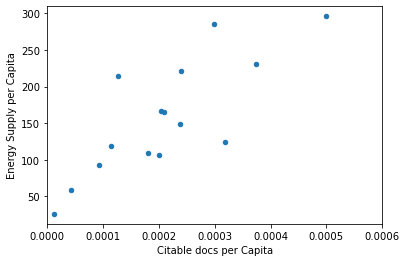

In [52]:

def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15['Energy Supply per Capita'] = pd.to_numeric(Top15['Energy Supply per Capita'])
    Top15['Citable docs per Capita'] = pd.to_numeric(Top15['Citable docs per Capita'])
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

    
plot9()

In [53]:
import scipy.stats as stats
def answer_nine():
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    q9['Energy Supply per Capita'] = pd.to_numeric(q9['Energy Supply per Capita'])
    q9['Cit docs per Capita'] = pd.to_numeric(q9['Cit docs per Capita'])
    corr, pval = stats.pearsonr(q9['Energy Supply per Capita'],q9['Cit docs per Capita'])
    print('corr = ', corr)
    print('pval = ', pval)
    return corr

print(answer_nine())
    

corr =  0.7940010435442942
pval =  0.0004083648953039728
0.7940010435442942


In [643]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [54]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


corr =  0.7940010435442942
pval =  0.0004083648953039728
corr =  0.7940010435442942
pval =  0.0004083648953039728


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [55]:
# create DataFrame for question 10
q10 = result_df

# count median
q10_median = np.median(q10[['% Renewable']])

# function for 'apply()' to put '1' if above median and '0' if below median
def categorize_renew(value):
    if value >= q10_median:
        return 1
    else:
        return 0

# create column 'HighRenew' with ones and zeroes
q10['HighRenew'] = q10['% Renewable'].apply(categorize_renew)
q10.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Country,PopEst,Citable docs per Capita,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,127191000000.0,93.0,19.75491,...,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28,China,1367645161.2903225,9.268997806448569e-05,1
United States,2,96661,94747,792274,265436,8.2,230,90838000000.0,286.0,11.57098,...,14964372000000.0,15204019634600.0,15542161722300.0,15773666098800.0,16156618476000.0,16548573278300.0,United States,317615384.61538464,0.0002983073383385808,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.0,149.0,10.23282,...,5498717815809.77,5473738114222.05,5569101602926.18,5644658523313.42,5642884448582.19,5669563143140.97,Japan,127409395.97315437,0.00023771402233459756,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000.0,124.0,10.60047,...,2403504326328.8,2450911011124.85,2479808627472.19,2533370110012.36,2605643189894.93,2666333396477.13,United Kingdom,63870967.741935484,0.0003187207070707071,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.0,214.0,17.28868,...,1524917468442.01,1589942641764.29,1645875899596.27,1666934123163.16,1678708855070.86,1616148858033.77,Russian Federation,143500000.0,0.00012753310104529617,1
Canada,6,17899,17620,215003,40930,12.01,149,10431000000.0,296.0,61.94543,...,1613406134731.12,1664086754804.89,1693132927878.08,1730687770724.13,1773485821199.77,1792608764608.81,Canada,35239864.86486486,0.0005000019173617103,1
Germany,7,17027,16831,140566,27426,8.26,126,13261000000.0,165.0,17.90153,...,3417298013245.03,3542371125827.81,3556723774834.44,3567317390728.48,3624386278145.7,3685555907284.77,Germany,80369696.96969697,0.0002094197270190785,1
India,8,15005,14841,128763,37209,8.58,115,33195000000.0,26.0,14.96908,...,1708458876829.92,1821872415623.62,1924235460945.25,2051981849791.69,2200616575310.97,2367206118959.06,India,1276730769.2307692,1.1624220515137823e-05,0
France,9,13153,12973,130632,28601,9.93,114,10597000000.0,166.0,17.02028,...,2646994701986.75,2702031788079.47,2706968211920.53,2722566887417.22,2729631788079.47,2761185430463.58,France,63837349.39759036,0.00020321959045012738,1


In [56]:
def answer_ten():
    # YOUR CODE HERE
    #raise NotImplementedError()
    #q10_1 = q10.reset_index()
    q10_1 = q10[['HighRenew']]
    #HighRenew = pd.Series(q10['HighRenew'].where(q10['HighRenew']==1).dropna())#.sort_values(ascending=True)
    #q10_1.set_index('Country',inplace=True)
    q10['HighRenew'] = pd.to_numeric(q10['HighRenew'])
    return q10_1['HighRenew']
    
print(type(answer_ten()))    

<class 'pandas.core.series.Series'>


In [57]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [58]:
# create dictionary needed
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def categorize_country(Country):
    return ContinentDict[Country]

# create a column with continents according to dictionary given
q10['Country'] = q10.index.values
q10['Continent'] = q10['Country'].apply(categorize_country)
q10.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Country,PopEst,Citable docs per Capita,HighRenew,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,127191000000.0,93.0,19.75491,...,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28,China,1367645161.2903225,9.268997806448569e-05,1,Asia
United States,2,96661,94747,792274,265436,8.2,230,90838000000.0,286.0,11.57098,...,15204019634600.0,15542161722300.0,15773666098800.0,16156618476000.0,16548573278300.0,United States,317615384.61538464,0.0002983073383385808,0,North America
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.0,149.0,10.23282,...,5473738114222.05,5569101602926.18,5644658523313.42,5642884448582.19,5669563143140.97,Japan,127409395.97315437,0.00023771402233459756,0,Asia
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000.0,124.0,10.60047,...,2450911011124.85,2479808627472.19,2533370110012.36,2605643189894.93,2666333396477.13,United Kingdom,63870967.741935484,0.0003187207070707071,0,Europe
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.0,214.0,17.28868,...,1589942641764.29,1645875899596.27,1666934123163.16,1678708855070.86,1616148858033.77,Russian Federation,143500000.0,0.00012753310104529617,1,Europe
Canada,6,17899,17620,215003,40930,12.01,149,10431000000.0,296.0,61.94543,...,1664086754804.89,1693132927878.08,1730687770724.13,1773485821199.77,1792608764608.81,Canada,35239864.86486486,0.0005000019173617103,1,North America
Germany,7,17027,16831,140566,27426,8.26,126,13261000000.0,165.0,17.90153,...,3542371125827.81,3556723774834.44,3567317390728.48,3624386278145.7,3685555907284.77,Germany,80369696.96969697,0.0002094197270190785,1,Europe
India,8,15005,14841,128763,37209,8.58,115,33195000000.0,26.0,14.96908,...,1821872415623.62,1924235460945.25,2051981849791.69,2200616575310.97,2367206118959.06,India,1276730769.2307692,1.1624220515137823e-05,0,Asia
France,9,13153,12973,130632,28601,9.93,114,10597000000.0,166.0,17.02028,...,2702031788079.47,2706968211920.53,2722566887417.22,2729631788079.47,2761185430463.58,France,63837349.39759036,0.00020321959045012738,1,Europe


In [59]:
# add 'pop' column
q10['pop'] = q8['pop']

In [60]:
# create aggregation DataFrame
q11_columns = ['size', 'sum', 'mean', 'std']
cols_to_agg = ['Continent', 'pop']
q11 = q10[cols_to_agg].groupby('Continent').agg(size=pd.NamedAgg(column="pop", aggfunc="size"),
                                               sum=pd.NamedAgg(column="pop", aggfunc="sum"),
                                               mean=pd.NamedAgg(column="pop", aggfunc="mean"),
                                               std=pd.NamedAgg(column="pop", aggfunc="std"))
q11.head()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106005,579733277.3221201,679097888.3660954
Australia,1,23316017.316017315,23316017.316017315,NaN
Europe,6,457929667.2163719,76321611.20272864,34647667.06562293
North America,2,352855249.4802495,176427624.74012476,199669644.8566684
South America,1,205915254.23728815,205915254.23728815,NaN


In [61]:
def answer_eleven():
    # YOUR CODE HERE
    #raise NotImplementedError()
    return q11
    
print(answer_eleven())    

               size                sum               mean               std
Continent                                                                  
Asia              5 2898666386.6106005  579733277.3221201 679097888.3660954
Australia         1 23316017.316017315 23316017.316017315               NaN
Europe            6  457929667.2163719  76321611.20272864 34647667.06562293
North America     2  352855249.4802495 176427624.74012476 199669644.8566684
South America     1 205915254.23728815 205915254.23728815               NaN


In [62]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [73]:
# select necessary columns
q12 = q10[['Continent','Country','% Renewable']]

# cut data values into 5 bins as given
q12 = pd.DataFrame(pd.cut(q12['% Renewable'],5))

# merging on 'Country' and 'Continent' values
q12 = pd.merge(q12,q10[['Country','Continent']],how='left',left_index=True,right_index=True)

# set 'Continent' as index
q12.set_index(['Continent','% Renewable'],inplace=True)

# aggregate data values
q12_df = q12.groupby(['Continent','% Renewable']).agg(Size=pd.NamedAgg(column="Country", aggfunc="size"))

# drop zeroes
q12_df = q12_df[q12_df['Size']>0]
q12_df.head()

Size
Continent % Renewable           
Asia      (2.212, 15.753]      4
          (15.753, 29.227]     1
Australia (2.212, 15.753]      1
Europe    (2.212, 15.753]      1
          (15.753, 29.227]     3

In [74]:
def answer_twelve():
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return q12_df['Size']
    
print(answer_twelve())

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: Size, dtype: int64


In [75]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [79]:
q13 = q8_for13['pop']
PopEst = q13.apply('{:,}'.format)

In [80]:
def answer_thirteen():
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return pd.Series(PopEst)

print(answer_thirteen())
    

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: pop, dtype: object


In [682]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [81]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


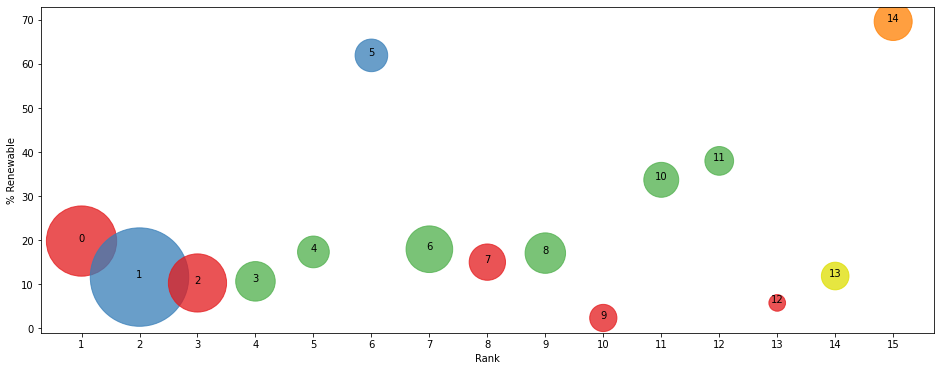

In [83]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    Top15['Rank'] = pd.to_numeric(Top15['Rank'])
    Top15['% Renewable'] = pd.to_numeric(Top15['% Renewable'])
    Top15.set_index(np.array(range(15)),inplace=True)
    
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

    
    
plot_optional()